# <a id='toc1_'></a>[Преданализ, визуализация](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Преданализ, визуализация](#toc1_)    
  - [Импорты](#toc1_1_)    
  - [Чтение датасетов](#toc1_2_)    
  - [Предварительные настройки](#toc1_3_)    
  - [Графики](#toc1_4_)    
    - [Основные занятия респондентов в 2020 (k1)](#toc1_4_1_)    
    - [Распределение возрастов (age = id_w - i_h4)](#toc1_4_2_)    
      - [Распределение возрастов всех респондентов](#toc1_4_2_1_)    
      - [Распределение возрастов женщин в декрете](#toc1_4_2_2_)    
    - [Распределение уровней образования](#toc1_4_3_)    
      - [Среди всех респондентов в 2020](#toc1_4_3_1_)    
      - [Среди женщин в декрете](#toc1_4_3_2_)    
    - [Плюшки от работодателя (k31_3, k31_4, k31_6)](#toc1_4_4_)    
    - [Воспринимаемая экономическая стабильность женщин (k15, y14)](#toc1_4_5_)    
    - [Распределение обычного и логарифмированного дохода (k66)](#toc1_4_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Импорты](#toc0_)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## <a id='toc1_2_'></a>[Чтение датасетов](#toc0_)

In [3]:
# hh = pd.read_csv(
#     "../1-5 database_hh_ 230323_с пустыми столбцами.csv", encoding="windows-1251"
# )
ind = pd.read_csv(
    "../1-5database_ind_240323_с пустыми столбцами.zip", encoding="windows-1251"
)
ml = pd.read_csv('../maternity_leave_without_ohe.csv')
fw = pd.read_csv('../full_wage.csv')
ind.head()

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/1640222825.py:4: DtypeWarning: Columns (102,224,253,263,274,292,295,368,408,532,546,578,614,620,673,683,693,733,743,753,763,773,845,849,886,889,892,898,975,977,979,987,995,1068,1075,1090,1092,1099,1115,1138,1141,1172,1174,1176,1236,1239,1242,1304,1316,1328,1399,1401,1406,1409,1428,1655,1657,1659,1752,1754) have mixed types. Specify dtype option on import or set low_memory=False.
  ind = pd.read_csv(


,Unnamed: 0,X,id_w,idind,id_i,redidi,id_h,psu,gr_vozr,gr_educ,...,m36_4,m36_5,m36_6,m37,i_x1,i_x2,i_x3,i_x5,i_x6,i_x7
0,1,1,2013,1,1000101,168601,10001,Ленинградская область,3,2,...,NaN,NaN,NaN,NaN,1.0,3.0,2.0,3.0,1.0,3.0
1,2,2,2013,2,1000102,168602,10001,Ленинградская область,3,1,...,NaN,NaN,NaN,NaN,1.0,3.0,3.0,3.0,2.0,2.0
2,3,3,2013,3,1000103,168603,10001,Ленинградская область,1,2,...,NaN,NaN,NaN,NaN,1.0,3.0,3.0,2.0,2.0,2.0
3,4,4,2013,4,1000104,168604,10001,Ленинградская область,1,1,...,NaN,NaN,NaN,NaN,1.0,2.0,3.0,2.0,3.0,1.0
4,5,5,2013,5,1000201,168701,10002,Ленинградская область,5,1,...,NaN,NaN,NaN,NaN,2.0,NaN,3.0,2.0,4.0,1.0


## <a id='toc1_3_'></a>[Предварительные настройки](#toc0_)

In [4]:
from matplotlib.font_manager import fontManager, FontProperties

# Add the font to the font manager
path = "./ACTAY-REGULAR.ttf"
fontManager.addfont(path)
prop = FontProperties(fname=path)

# Set the font in Seaborn
RC = {
    "svg.fonttype": "path",
    "figure.figsize": (16, 9),
    "figure.dpi": 120,
    "figure.autolayout": True,
    "font.family": "Actay",
}
COLOR = "#69d"
PALETTE = sns.dark_palette(COLOR, reverse=True)
sns.set_palette(PALETTE)
sns.set_theme(
    context="talk", style="darkgrid", palette="deep", font=prop.get_name(), rc=RC
)
# sns.set(font=prop.get_name())

In [5]:
ind.i_h4.value_counts()

i_h4
2    35265
1    26025
Name: count, dtype: int64

## <a id='toc1_4_'></a>[Графики](#toc0_)

### <a id='toc1_4_1_'></a>[Основные занятия респондентов в 2020 (k1)](#toc0_)


/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/4235044221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


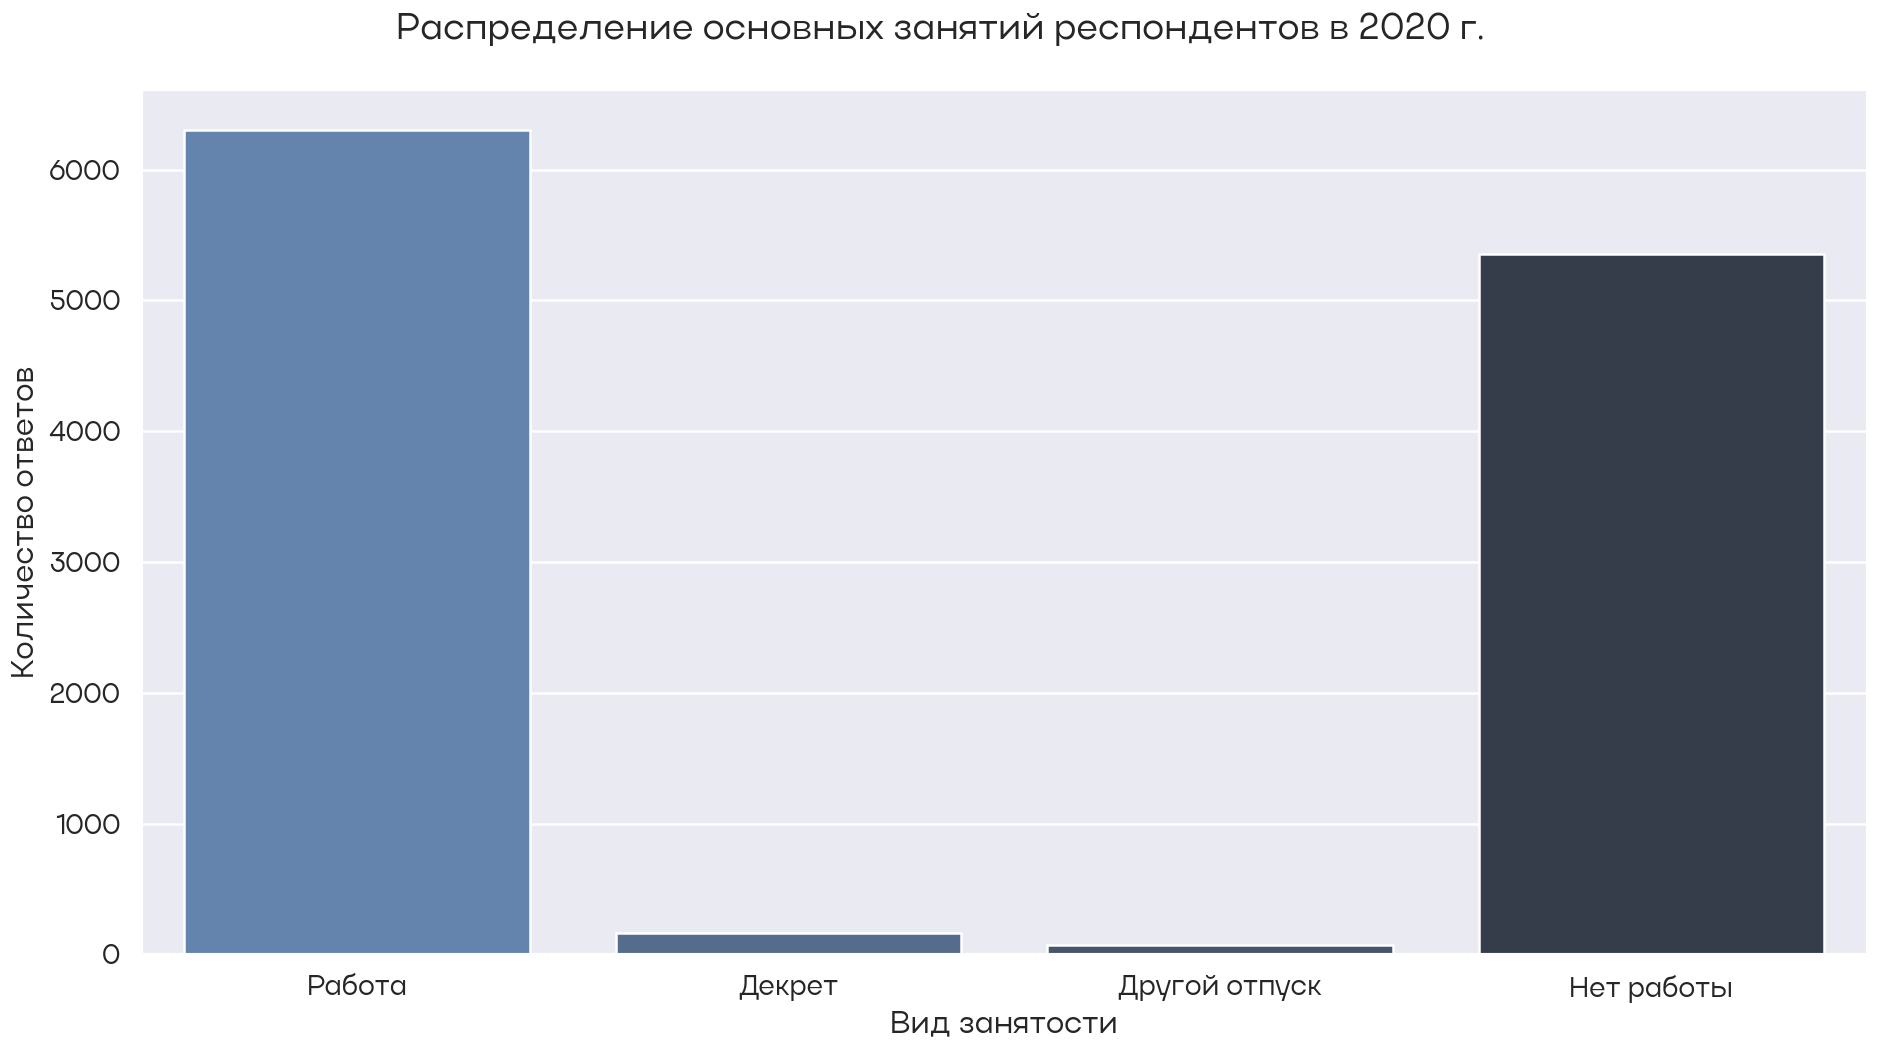

In [6]:
fig, ax = plt.subplots()
k1 = ind[ind.id_w == 2020].k1
sns.barplot(
    dict(
        [
            ("Работа", sum(k1 == 1)),
            ("Декрет", sum(k1 == 2)),
            ("Другой отпуск", sum(k1.isin((3, 4)))),
            ("Нет работы", sum(k1 == 5)),
        ]
    ),
    palette=PALETTE[1:5],
    ax=ax,
)
fig.suptitle("Распределение основных занятий респондентов в 2020 г.")
ax.set_xlabel("Вид занятости")
ax.set_ylabel("Количество ответов")
fig.tight_layout()
fig.savefig("k1.svg")

### <a id='toc1_4_2_'></a>[Распределение возрастов (age = id_w - i_h4)](#toc0_)

In [7]:
ind["age"] = ind.id_w - ind.i_h5

#### <a id='toc1_4_2_1_'></a>[Распределение возрастов всех респондентов](#toc0_)

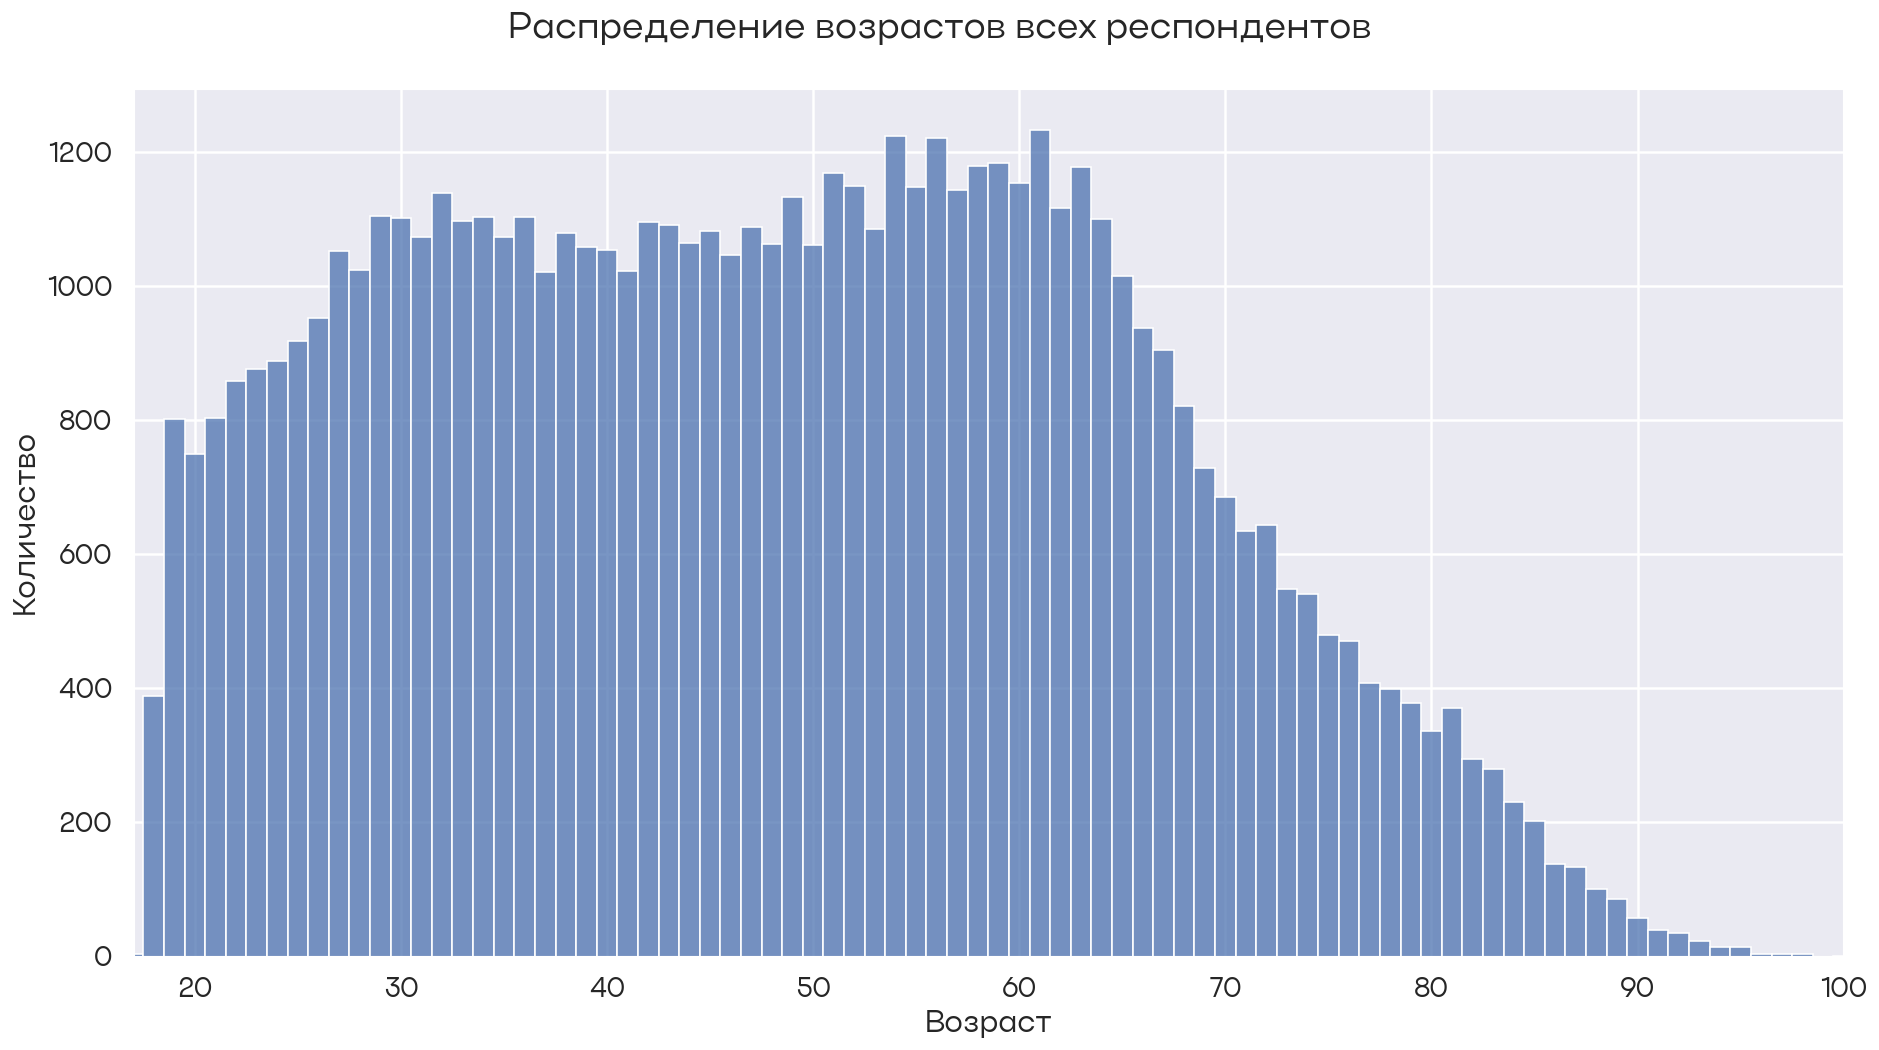

In [8]:
fig, ax = plt.subplots()
fig.suptitle('Распределение возрастов всех респондентов')
MAX_VALUE = ind[ind.k1 == 2].age.quantile(0.99)
ind["age"] = ind.id_w - ind.i_h5
sns.histplot(x=ind.age, discrete=True, ax=ax)
ax.set_xlim((ind.age.min(), ind.age.max()))
# ax.axvspan(MAX_VALUE + 0.5, ind.age.max(), alpha=0.3)
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество')
fig.savefig("age_distribution.svg")
# fmt: off
fig;

#### <a id='toc1_4_2_2_'></a>[Распределение возрастов женщин в декрете](#toc0_)

In [9]:
ind[(ind.k1 == 2) & (ind.i_h4 == 1)].age  # мужчины в декрете

2290     38
4960     35
23473    32
27783    39
29637    29
36153    36
53171    24
56546    49
58929    24
59649    30
59693    35
60044    36
61175    35
Name: age, dtype: int64

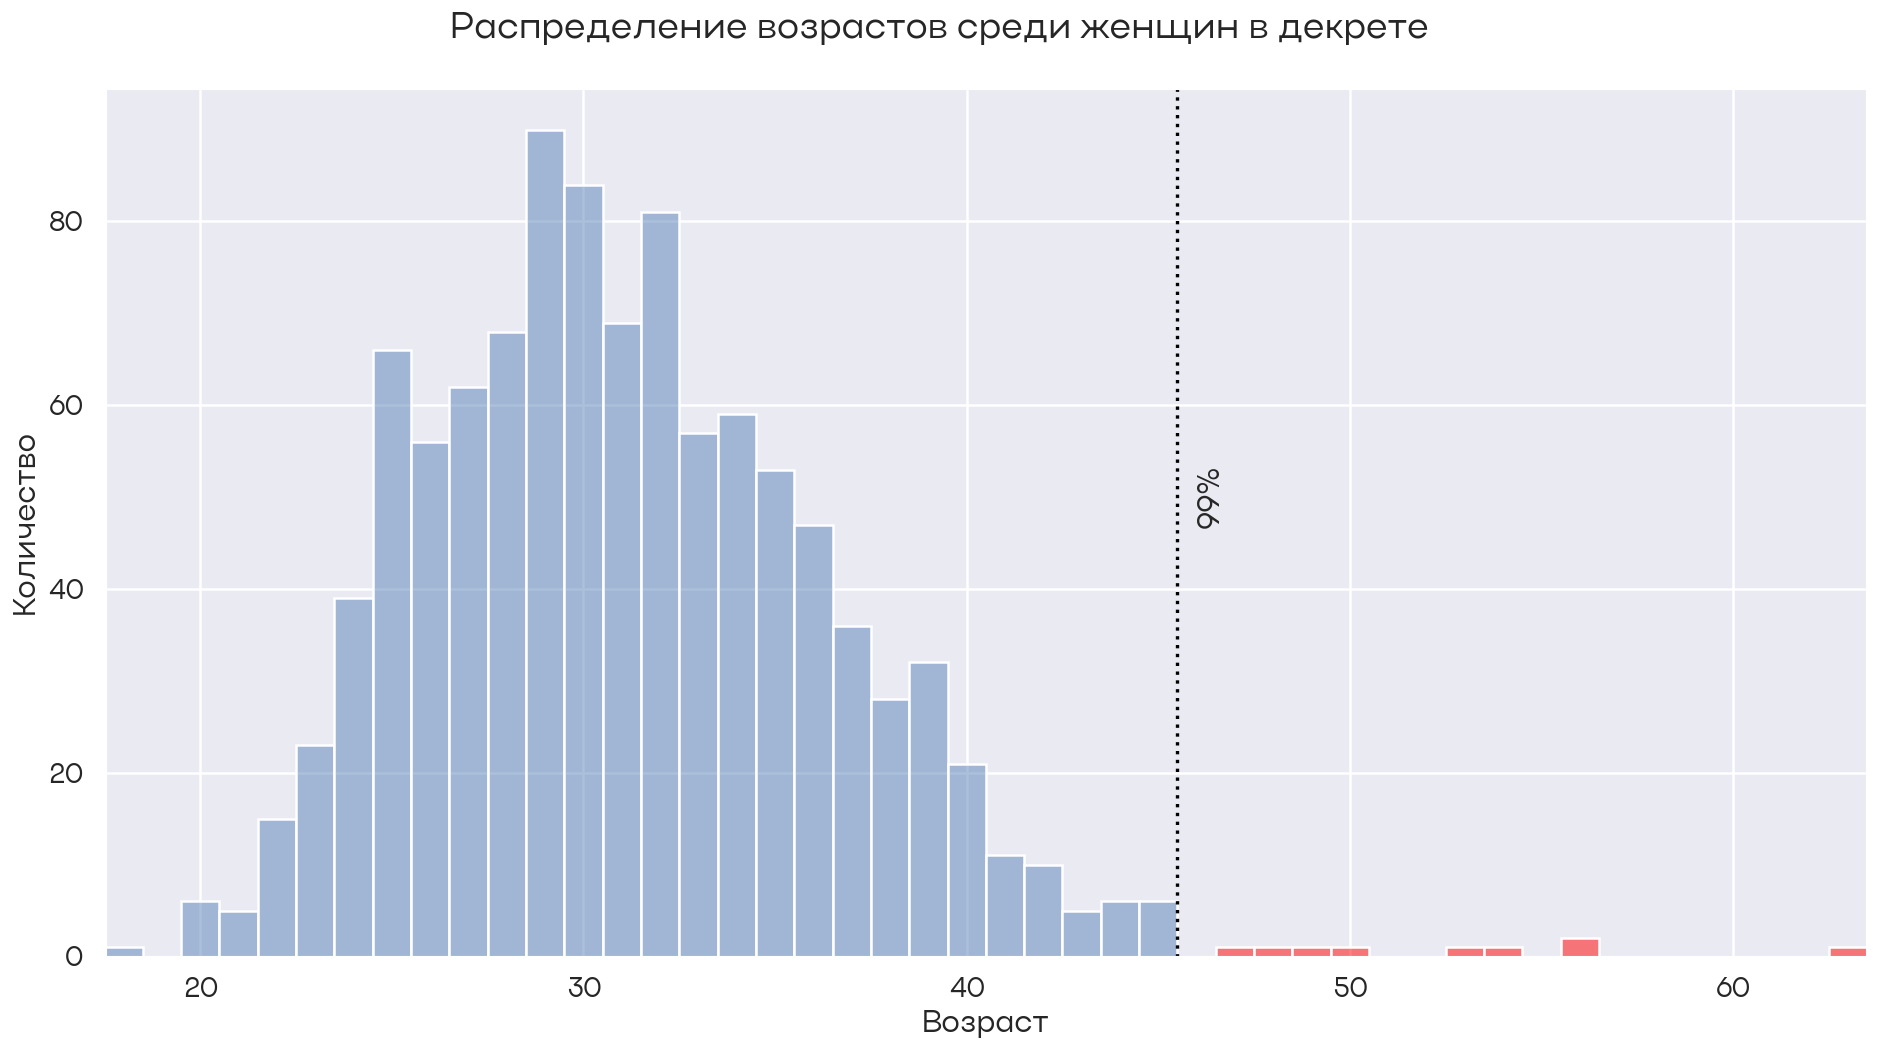

In [10]:
fig, ax = plt.subplots()
fig.suptitle("Распределение возрастов среди женщин в декрете")
sns.histplot(
    x=ind[ind.k1 == 2].age,
    discrete=True,
    hue=ind[ind.k1 == 2].age.apply(lambda x: 0 if x > MAX_VALUE else 1),
    palette=["red", PALETTE[1]],
    ax=ax,
)
ax.get_legend().remove()
ax.set_xlim((ind[ind.k1 == 2].age.min() - 0.5, ind[ind.k1 == 2].age.max() + 0.5))
ax.axvline(MAX_VALUE + 0.5, linestyle=":", color="black", linewidth=2)
ax.text(s="99%", x=MAX_VALUE + 1, y=ax.get_ylim()[1] / 2, rotation=90)
ax.set_xlabel("Возраст")
ax.set_ylabel("Количество")
fig.savefig("age_distribution_pregnant.svg")
# fmt: off
fig;

### <a id='toc1_4_3_'></a>[Распределение уровней образования](#toc0_)

#### <a id='toc1_4_3_1_'></a>[Среди всех респондентов в 2020](#toc0_)

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/724312253.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/724312253.py:5: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(


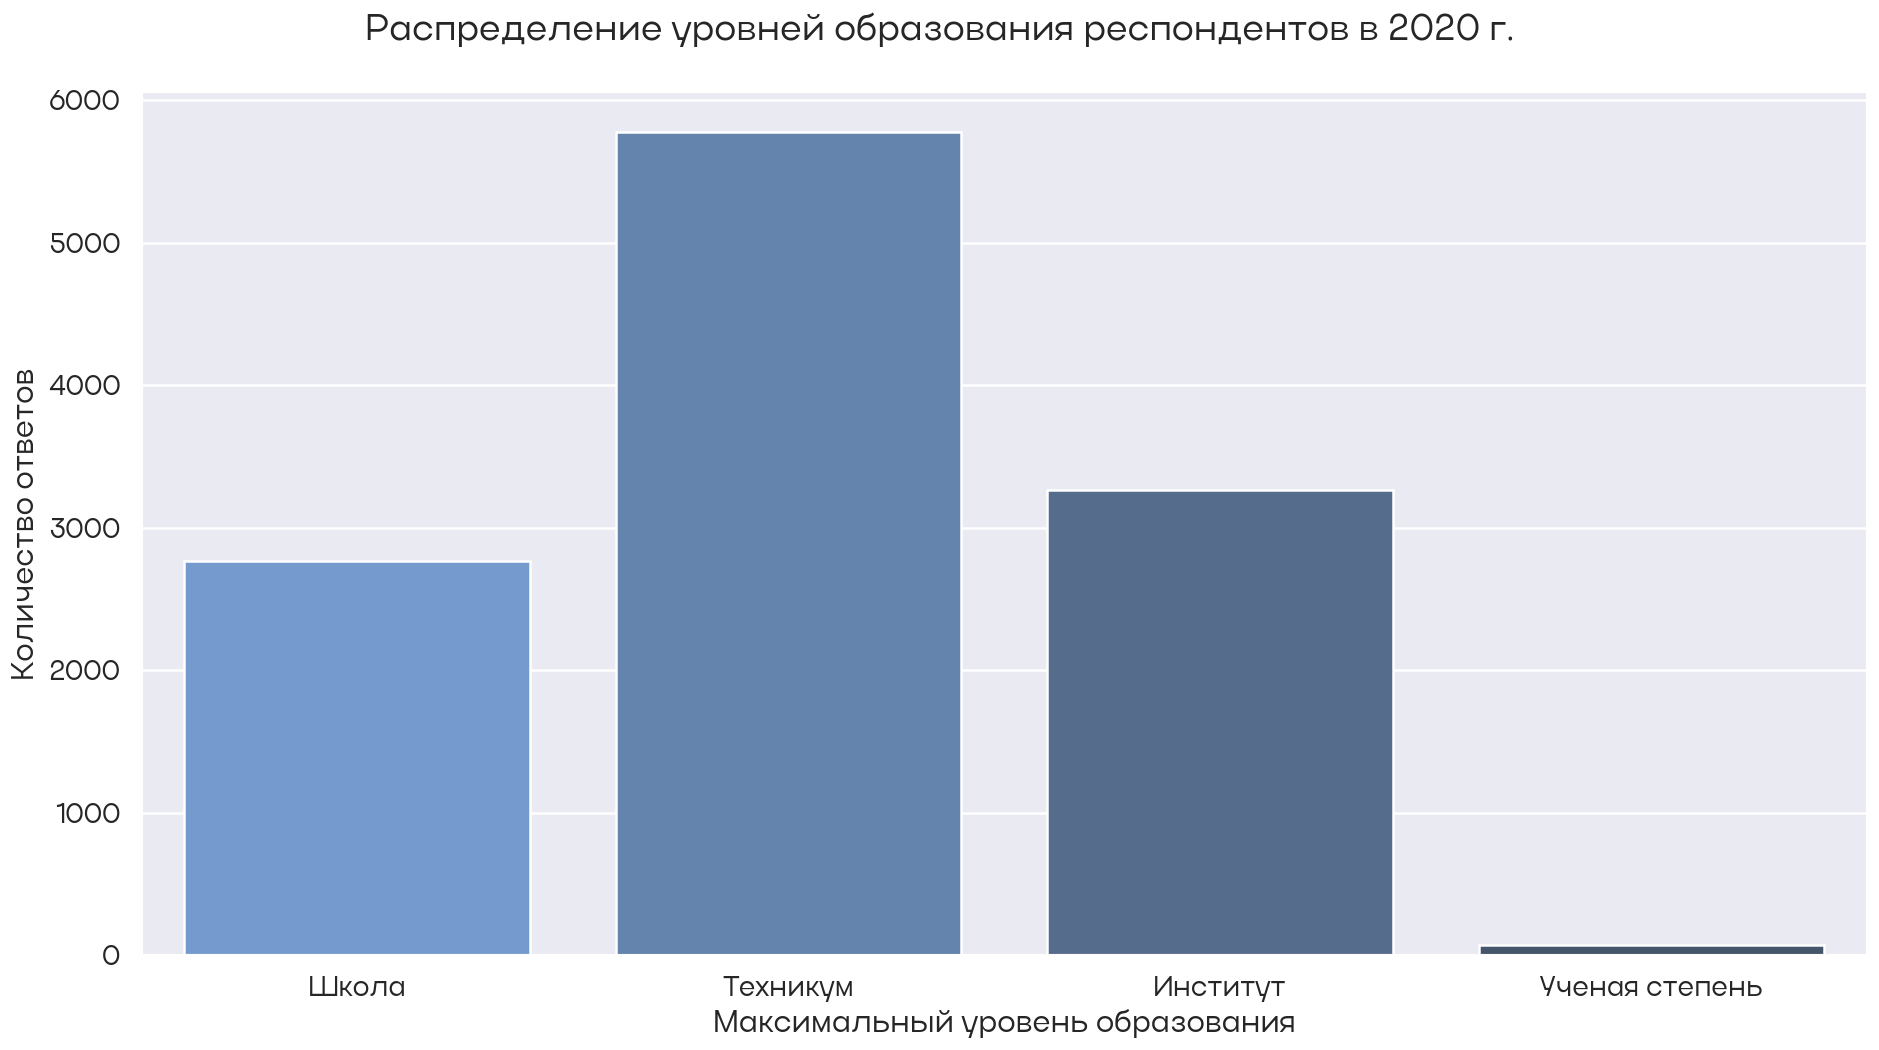

In [11]:
y5 = ind[ind.id_w == 2020].y5


fig, ax = plt.subplots()
sns.barplot(
    dict(
        [
            ("Школа", sum(y5.isin((1, 2)))),
            ("Техникум", sum(y5.isin((3, 4, 5, 6)))),
            ("Институт", sum(y5 == 7)),
            ("Ученая степень", sum(y5.isin((8, 9)))),
        ]
    ),
    palette=PALETTE,
    ax=ax,
)
fig.suptitle("Распределение уровней образования респондентов в 2020 г.")
ax.set_ylabel("Количество ответов")
ax.set_xlabel("Максимальный уровень образования")
fig.tight_layout()
fig.savefig("y5.svg")

#### <a id='toc1_4_3_2_'></a>[Среди женщин в декрете](#toc0_)

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/810150525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/810150525.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([' ']*9)


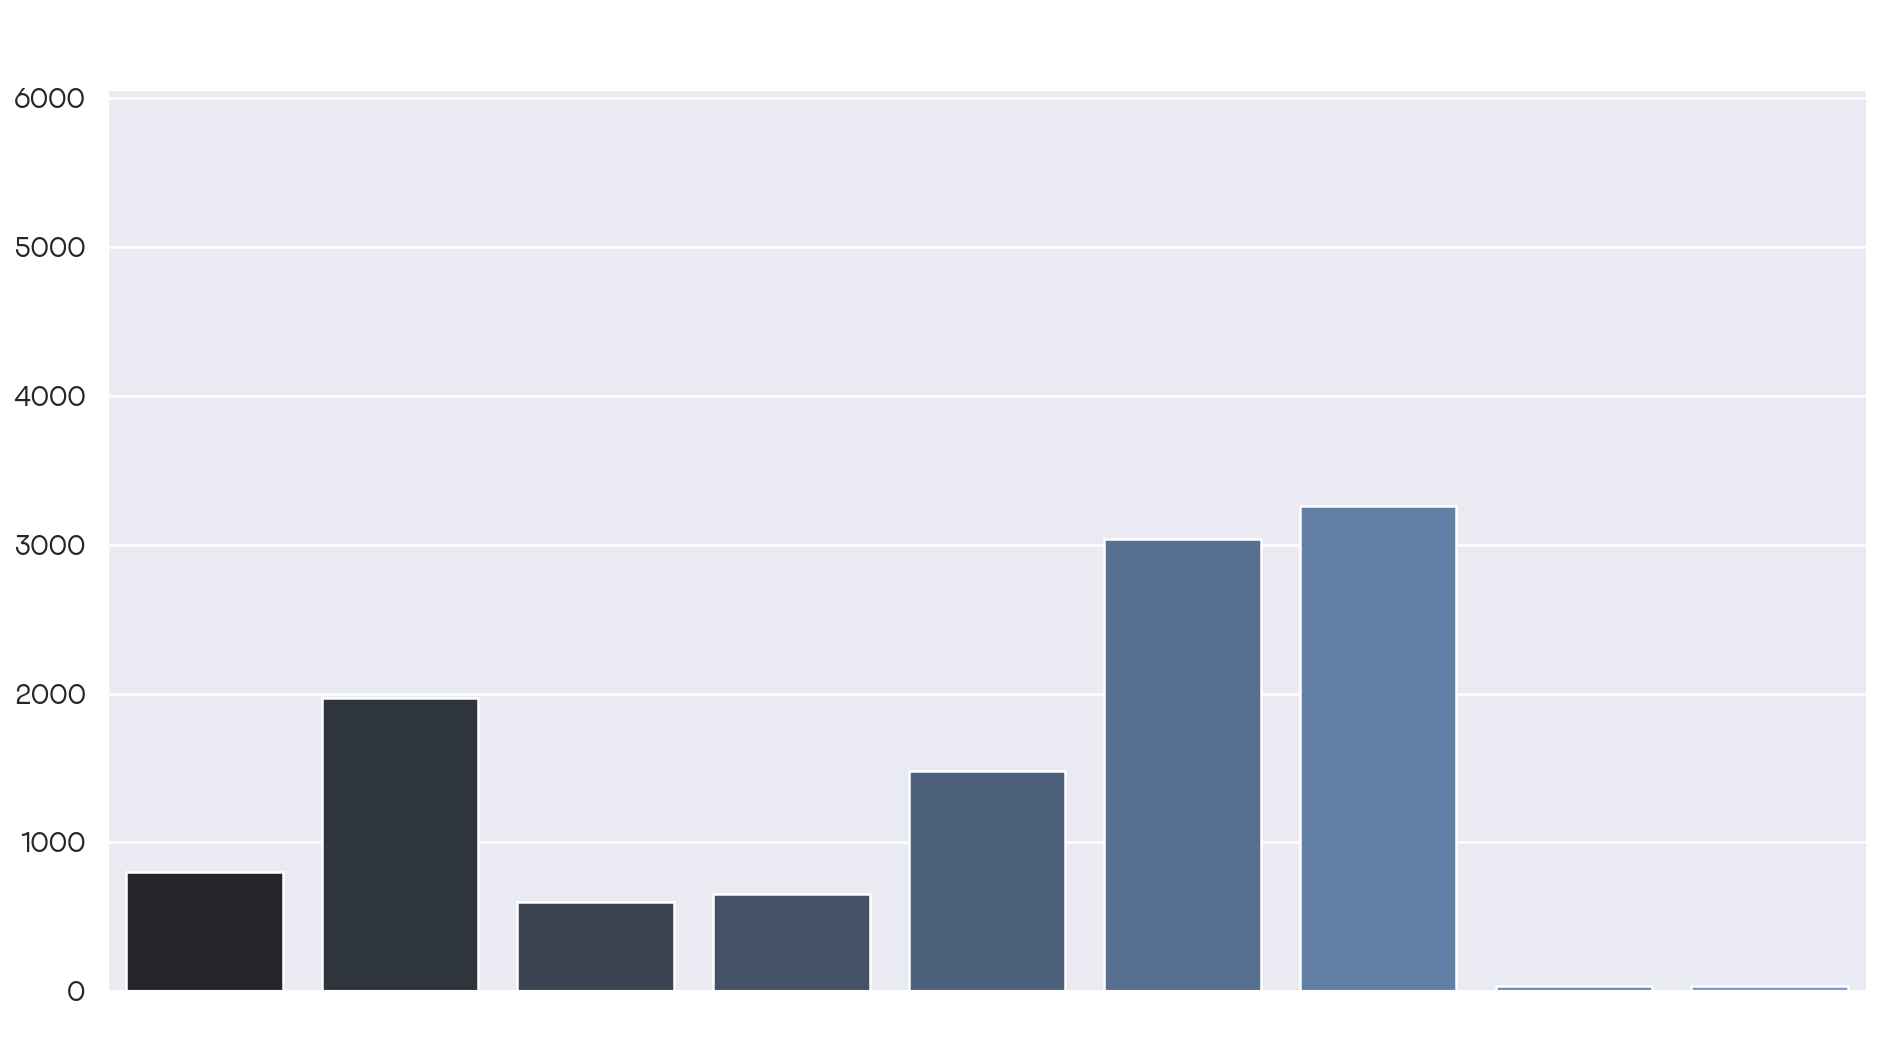

In [12]:
fig, ax2 = plt.subplots()
plt.suptitle(' ')
sns.barplot(
    dict(
        [
            ("Начальная", sum(y5 == 1)),
            ("Полная", sum(y5 == 2)),
            ("Проф. курсы", sum(y5 == 3)),
            ("ПТУ, ФЗУ, ФЗО", sum(y5 == 4)),
            ("Техническое училище", sum(y5 == 5)),
            ("Техникум или другое училище", sum(y5 == 6)),
            ("Институт, вкл. магистратуру", sum(y5 == 7)),
            ("Аспирантура, ординатура", sum(y5 == 8)),
            ("Ученая степень", sum(y5 == 9)),
        ]
    ),
    palette=sns.dark_palette(COLOR, n_colors=9),
    ax=ax2,
)
ax2.set_xticklabels([' ']*9)
ax2.sharey(ax)
fig.savefig('edu_pregnant_specific.svg')
# fmt: off
fig;

<Axes: xlabel='y5', ylabel='Count'>

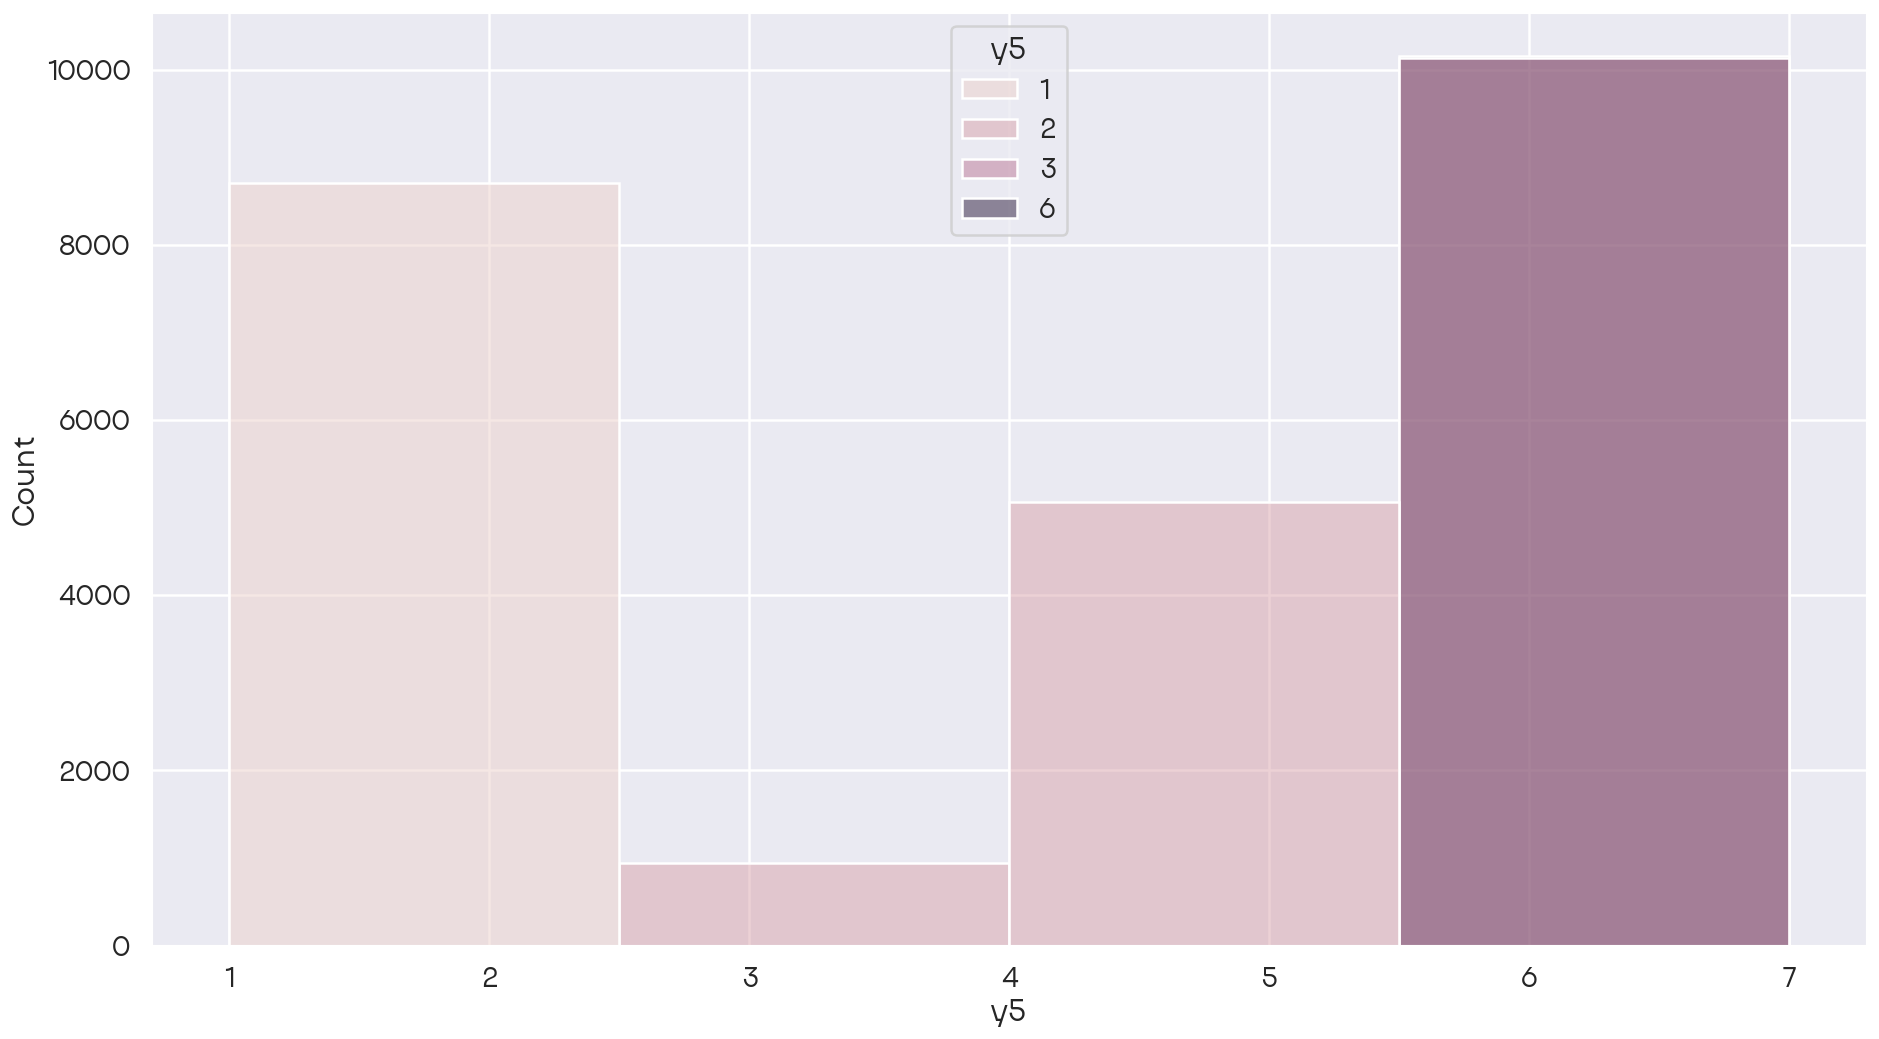

In [13]:
y5 = ind.y5[(ind.y5 < 8) & (ind.i_h4 == 2)]
fig, ax = plt.subplots()
y5_hue = pd.DataFrame(
    {
        "name": [
            "Начальная",
            "Полная",
            "Проф. курсы",
            "ПТУ, ФЗУ, ФЗО",
            "Техническое училище",
            "Техникум или другое училище",
            "Институт, вкл. магистратуру",
            "Аспирантура, ординатура",
            "Ученая степень",
        ],
        "type": ["Школа"] * 2
        + ["Техникум"] * 4
        + ["Институт"]
        + ["Ученая степень"] * 2,
        "count": [sum(y5 == i) for i in range(1, 10)],
    }
)
sns.histplot(
    x=y5[y5 < 8],
    bins=4,
    hue=y5[y5 < 8].replace({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 5: 2, 7: 3, 8: 4, 9: 4}),
    ax=ax,
)

### <a id='toc1_4_4_'></a>[Плюшки от работодателя (k31_3, k31_4, k31_6)](#toc0_)

In [14]:
ind.k31_3.value_counts()

k31_3
1.0           24850
2.0            8048
99999997.0     1988
99999998.0      239
99999999.0      126
Name: count, dtype: int64

In [15]:
sns.set_style(rc=RC, style='ticks')

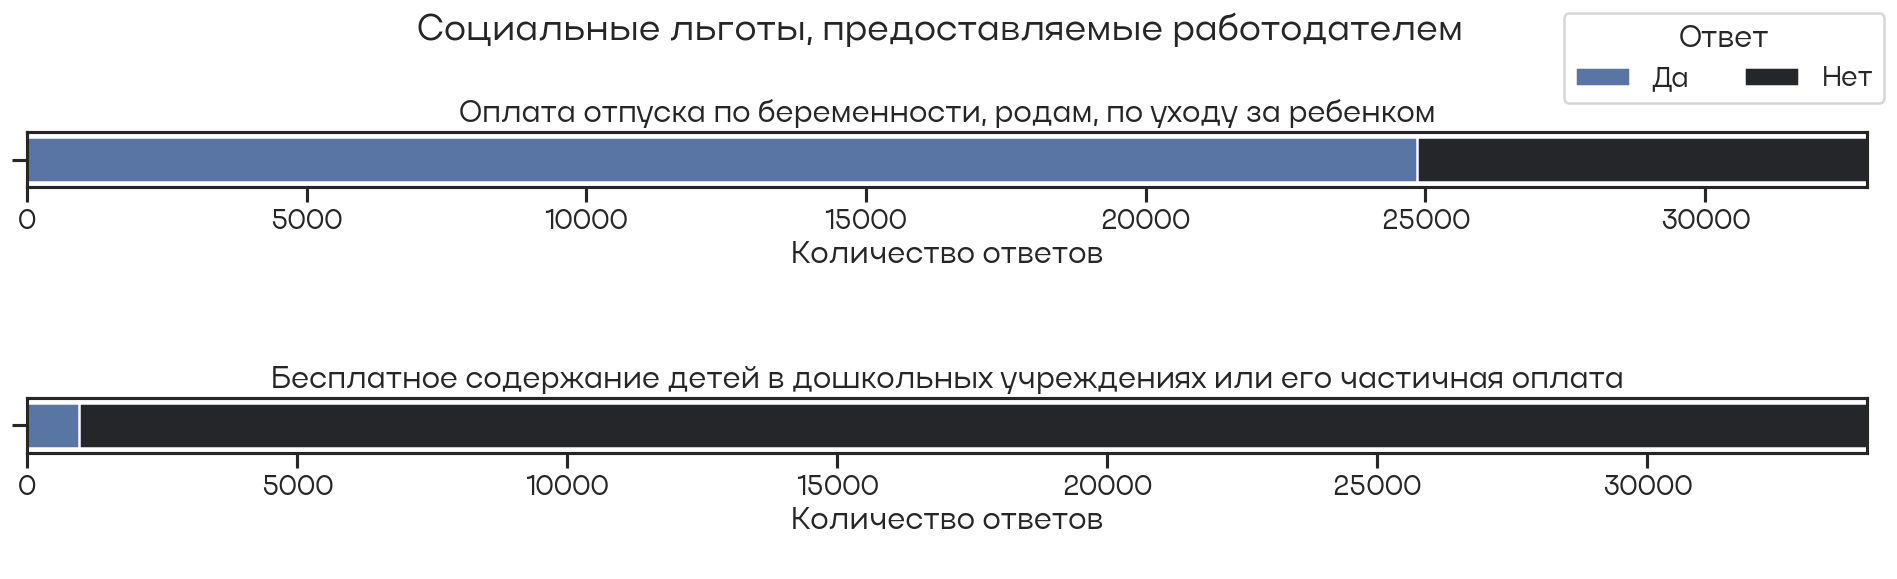

In [16]:
sns.set_style(rc=RC, style="ticks")
fig, ax = plt.subplots(2, figsize=(16, 5))
fig.suptitle("Социальные льготы, предоставляемые работодателем")
# k31_3
ax[0].set_title("Оплата отпуска по беременности, родам, по уходу за ребенком")
sns.barplot(x=sum(ind.k31_3.isin((1, 2))), hue=["Нет"], palette=PALETTE[-1:], ax=ax[0])
sns.barplot(x=sum(ind.k31_3.isin((1,))), hue=["Да"], ax=ax[0])
ax[0].set_xlabel("Количество ответов\n\n")
ax[0].get_legend().remove()
ax[0].set_xlim(0, sum(ind.k31_3 < 7))
# # k31_4
# ax[1].set_title("Бесплатное или частично оплаченное лечение")
# sns.barplot(x=sum(ind.k31_4 < 7), hue=["Нет"], palette=PALETTE[-1:], ax=ax[1])
# sns.barplot(x=sum(ind.k31_4 == 1), hue=["Да"], ax=ax[1])
# ax[1].set_xlabel("Количество ответов\n")
# ax[1].get_legend().remove()
# ax[1].set_xlim(0, sum(ind.k31_4 < 7))
# k31_6
ax[1].set_title(
    "Бесплатное содержание детей в дошкольных учреждениях или его частичная оплата"
)
sns.barplot(x=sum(ind.k31_6 < 7), hue=["Нет"], palette=PALETTE[-1:], ax=ax[1])
sns.barplot(x=sum(ind.k31_6 == 1), hue=["Да"], ax=ax[1])
ax[1].set_xlabel("Количество ответов\n")
ax[1].get_legend().remove()
ax[1].set_xlim(0, sum(ind.k31_6 < 7))

# Fig
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(
    handles[::-1], labels[::-1], ncols=2, frameon=True, loc="upper right", title="Ответ"
)
fig.savefig("social_benifits_(k31).svg")
# fmt: off
fig;

### <a id='toc1_4_5_'></a>[Воспринимаемая экономическая стабильность женщин (k15, y14)](#toc0_)

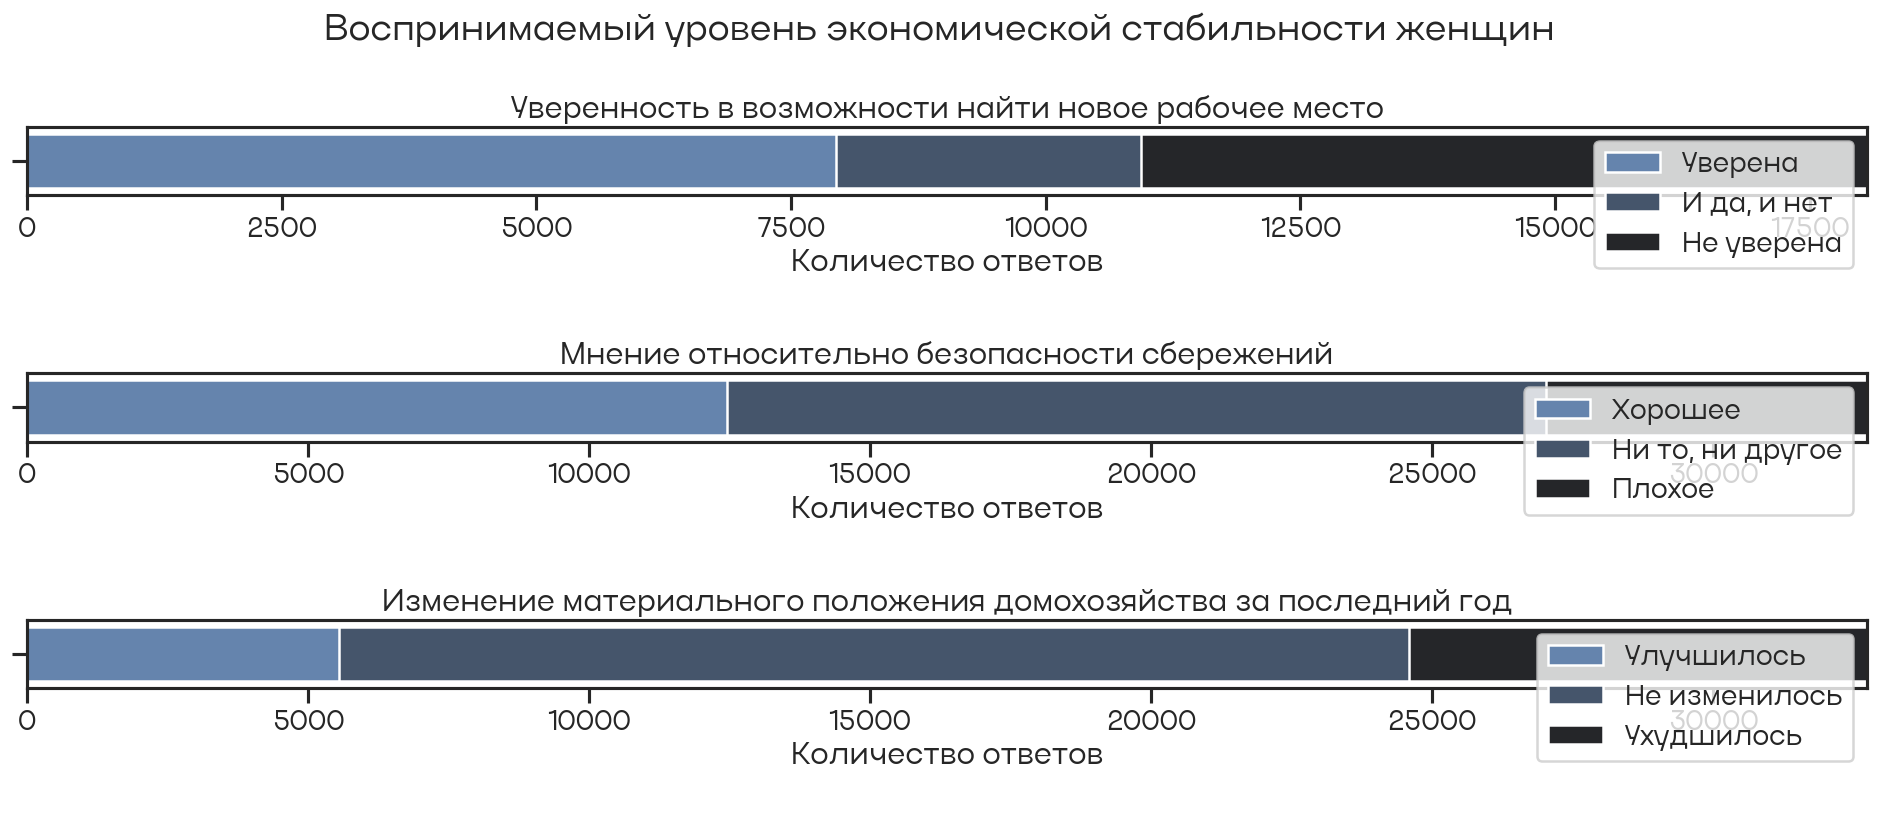

In [17]:
sns.set_style(rc=RC, style='ticks')
fig, ax = plt.subplots(3, figsize=(16, 7))
fig.suptitle("Воспринимаемый уровень экономической стабильности женщин")
# k15, 3 градации
k15n = ind[ind.i_h4 == 2].k15.apply(
    lambda x: {1: 3, 2: 3, 3: 2, 4: 1, 5: 1}[x] if x in range(1, 6) else None
)
ax[0].set_title("Уверенность в возможности найти новое рабочее место")
sns.barplot(x=sum(k15n.isin((1, 2, 3))), hue=["-"], palette=PALETTE[5:6], ax=ax[0])
sns.barplot(x=sum(k15n.isin((1, 2))), hue=["+-"], palette=PALETTE[3:4], ax=ax[0])
sns.barplot(x=sum(k15n.isin((1,))), hue=["+"], palette=PALETTE[1:2], ax=ax[0])
ax[0].set_xlabel("Количество ответов")
ax[0].legend(ax[0].get_legend_handles_labels()[0][::-1], ['Уверена', "И да, и нет", "Не уверена"])
ax[0].set_xlim(0, sum(k15n.isin(range(1, 4))))
# y14, 3 градации
y14n = ind[ind.i_h4 == 2].y14.apply(
    lambda x: {1: 3, 2: 1, 3: 2}[x] if x in range(1, 6) else None
)
ax[1].set_title("Мнение относительно безопасности сбережений")
sns.barplot(x=sum(y14n.isin((1, 2, 3))), hue=["-"], palette=PALETTE[5:6], ax=ax[1])
sns.barplot(x=sum(y14n.isin((1, 2))), hue=["+-"], palette=PALETTE[3:4], ax=ax[1])
sns.barplot(x=sum(y14n.isin((1,))), hue=["+"], palette=PALETTE[1:2], ax=ax[1])
ax[1].set_xlabel("Количество ответов\n")
ax[1].legend(ax[1].get_legend_handles_labels()[0][::-1], ['Хорошее', "Ни то, ни другое", "Плохое"])
ax[1].set_xlim(0, sum(y14n.isin(range(1, 4))))
# y11
y11n = ind[(ind.i_h4 == 2) & (ind.y11 < 4)].y11
ax[2].set_title("Изменение материального положения домохозяйства за последний год")
sns.barplot(x=sum(y11n.isin((1, 2, 3))), hue=["-"], palette=PALETTE[5:6], ax=ax[2])
sns.barplot(x=sum(y11n.isin((1, 2))), hue=["+-"], palette=PALETTE[3:4], ax=ax[2])
sns.barplot(x=sum(y11n.isin((1,))), hue=["+"], palette=PALETTE[1:2], ax=ax[2])
ax[2].set_xlabel("Количество ответов\n")
ax[2].legend(ax[2].get_legend_handles_labels()[0][::-1], ['Улучшилось', "Не изменилось", "Ухудшилось"])
ax[2].set_xlim(0, sum(y14n.isin(range(1, 4))))
# Fig
# fig.legend(
#     handles,
#     map(
#         lambda x: {
#             "+": "Уверена/хорошее/улучшится",
#             "+-": "И да, и нет / ни то, ни другое / не изменится",
#             "-": "Не уверена/плохое/ухудшится",
#         }[x],
#         labels,
#     ),
#     ncols=3,
#     frameon=True,
#     loc="lower right",
#     title="Ответ",
# )
fig.savefig("economic_stability_(k15,_y14).svg")
# fmt: off
fig;

In [18]:
sns.set_style(rc=RC, style='darkgrid')

### <a id='toc1_4_6_'></a>[Распределение обычного и логарифмированного дохода (k66)](#toc0_)

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/486333793.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


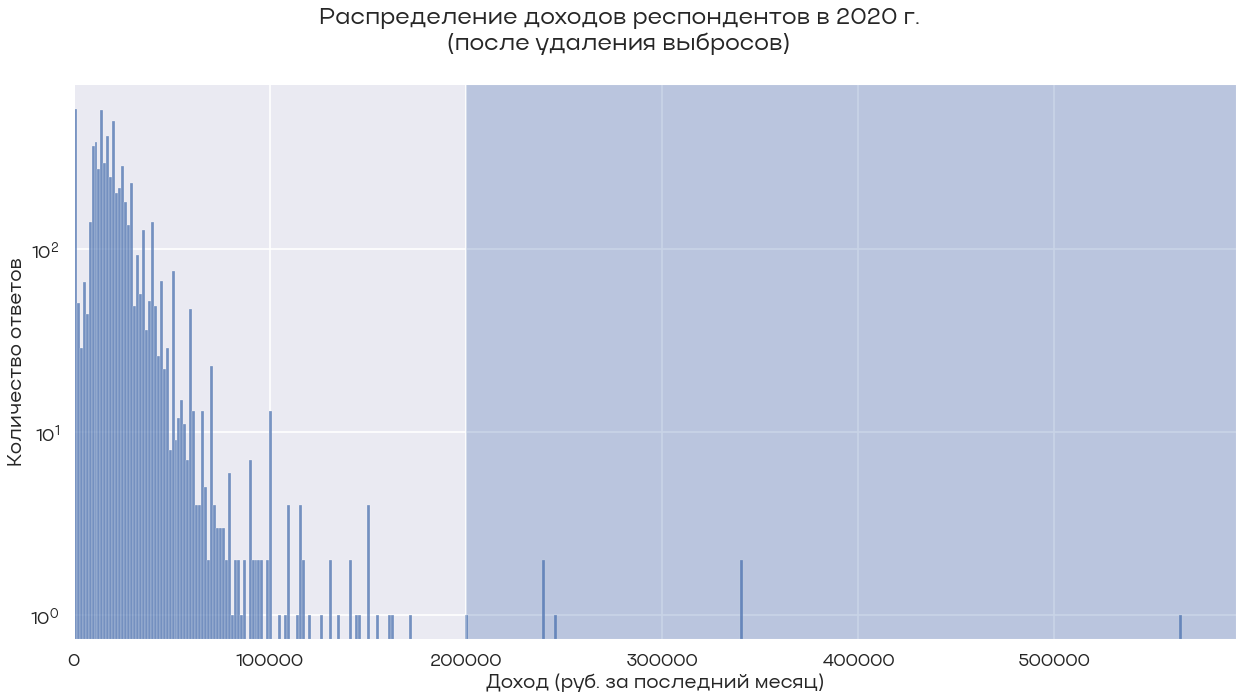

In [19]:
k66 = ind[(ind.id_w == 2020) & (ind.i_h4 == 2)].k66_r
sns.set_style(rc=RC, style='darkgrid')
OUTLIERS_MIN = 200_000
fig, ax = plt.subplots()
fig.set_dpi(80)

fig.suptitle("Распределение доходов респондентов в 2020 г.\n(после удаления выбросов)")
k66 = k66[k66 < 3_000_000]
sns.histplot(
    x=k66,
    ax=ax,
    palette="mako",
)
ax.set_xlabel("Доход (руб. за последний месяц)")
ax.set_ylabel("Количество ответов")
ax.set_xlim(0, ax.get_xlim()[1])
ax.axvspan(OUTLIERS_MIN, ax.get_xlim()[1], alpha=0.3)

fig.tight_layout()
fig.savefig("k66.svg")
ax.set_yscale("log")
# fmt: off
fig;

In [20]:
sum(ind.k66_r > 200_000)  # Удалено выбросов

962

In [21]:
cpi = pd.DataFrame(
    {
        "cpi": {
            2010: 1.088,
            2011: 1.061,
            2012: 1.066,
            2013: 1.065,
            2014: 1.114,
            2015: 1.129,
            2016: 1.054,
            2017: 1.025,
            2018: 1.043,
            2019: 1.03,
            2020: 1.049,
            2021: 1,
            2022: 1,
        }
    }
)
for y in range(cpi.index.max() - 1, cpi.index.min(), -1):
    cpi.at[y, "cpi"] = cpi.at[y, "cpi"] * cpi.at[y + 1, "cpi"]
ind["k66_indexed"] = ind.apply(lambda x: cpi.at[x.id_w, "cpi"] * x.k66_r, axis=1)
fw["k66_indexed"] = fw.apply(lambda x: cpi.at[x.id_w, "cpi"] * x.k66_r, axis=1)

#### Среди всех респондентов

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/1170787696.py:5: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.kdeplot(
/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/1170787696.py:8: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.kdeplot(


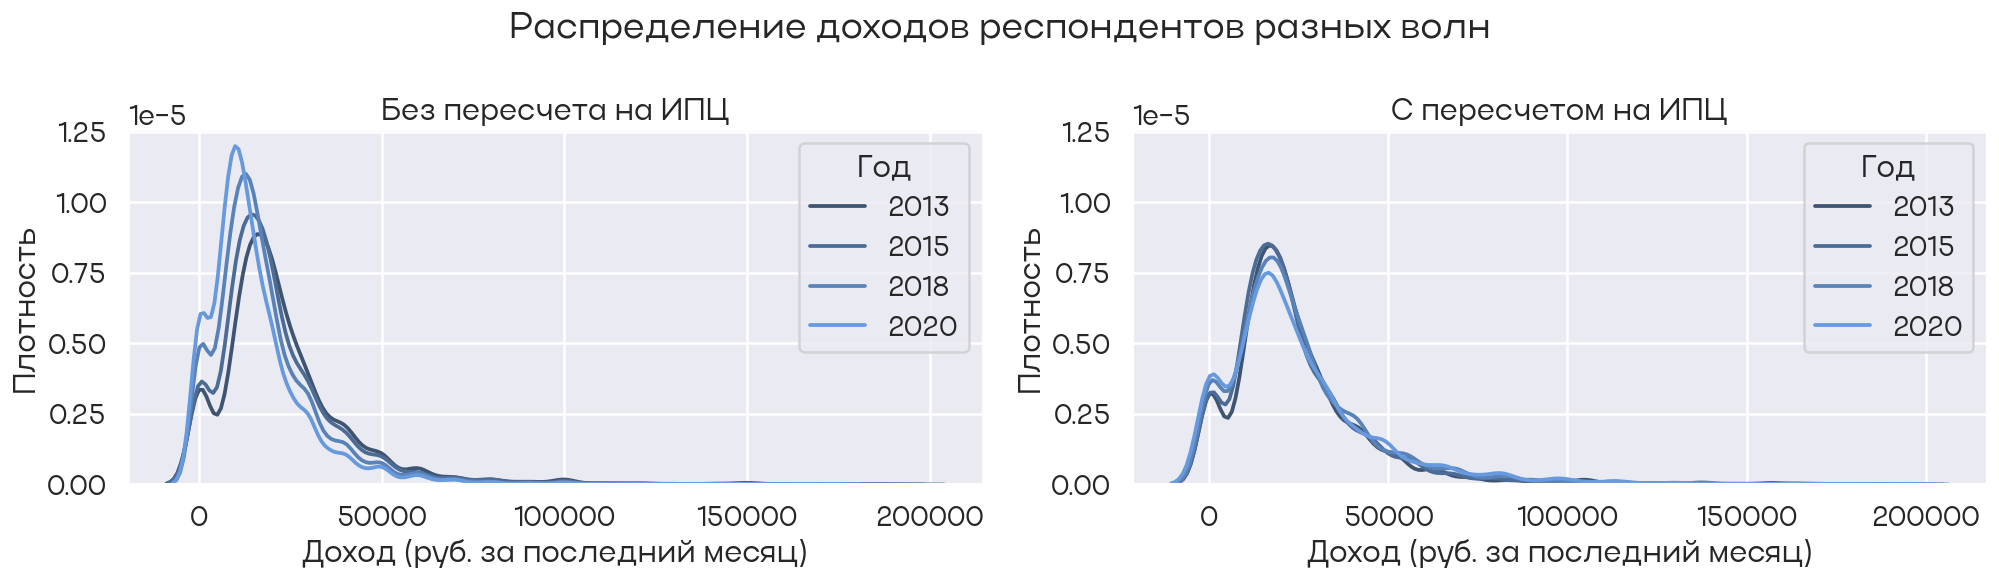

In [22]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(17)
fig.set_figheight(5)
fig.suptitle("Распределение доходов респондентов разных волн")
sns.kdeplot(
    data=ind[ind.k66_r < 200_000], x="k66_r", hue="id_w", ax=ax[0], palette=PALETTE
)
sns.kdeplot(
    data=ind[ind.k66_indexed < 200_000],
    x="k66_indexed",
    hue="id_w",
    ax=ax[1],
    palette=PALETTE
)
ax[0].set_title("Без пересчета на ИПЦ")
ax[0].set_xlabel("Доход (руб. за последний месяц)")
ax[0].set_ylabel('Плотность')
ax[0].legend(title="Год", labels=[2013, 2015, 2018, 2020])
ax[1].set_title("С пересчетом на ИПЦ")
ax[1].set_xlabel("Доход (руб. за последний месяц)")
ax[1].legend(title="Год", labels=[2013, 2015, 2018, 2020])
ax[1].set_ylabel('Плотность')
ax[1].sharey(ax[0])
fig.savefig("k66_k66_indexed_dist.svg")
# fmt: off
fig;

#### Среди женщин в декрете в 2020 году

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/447020503.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=math.e ** full_wage[fw.poyavlenie_child == 1], ax=ax, palette=PALETTE)
/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/447020503.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=math.e ** full_wage[fw.poyavlenie_child == 0], ax=ax, palette=PALETTE)


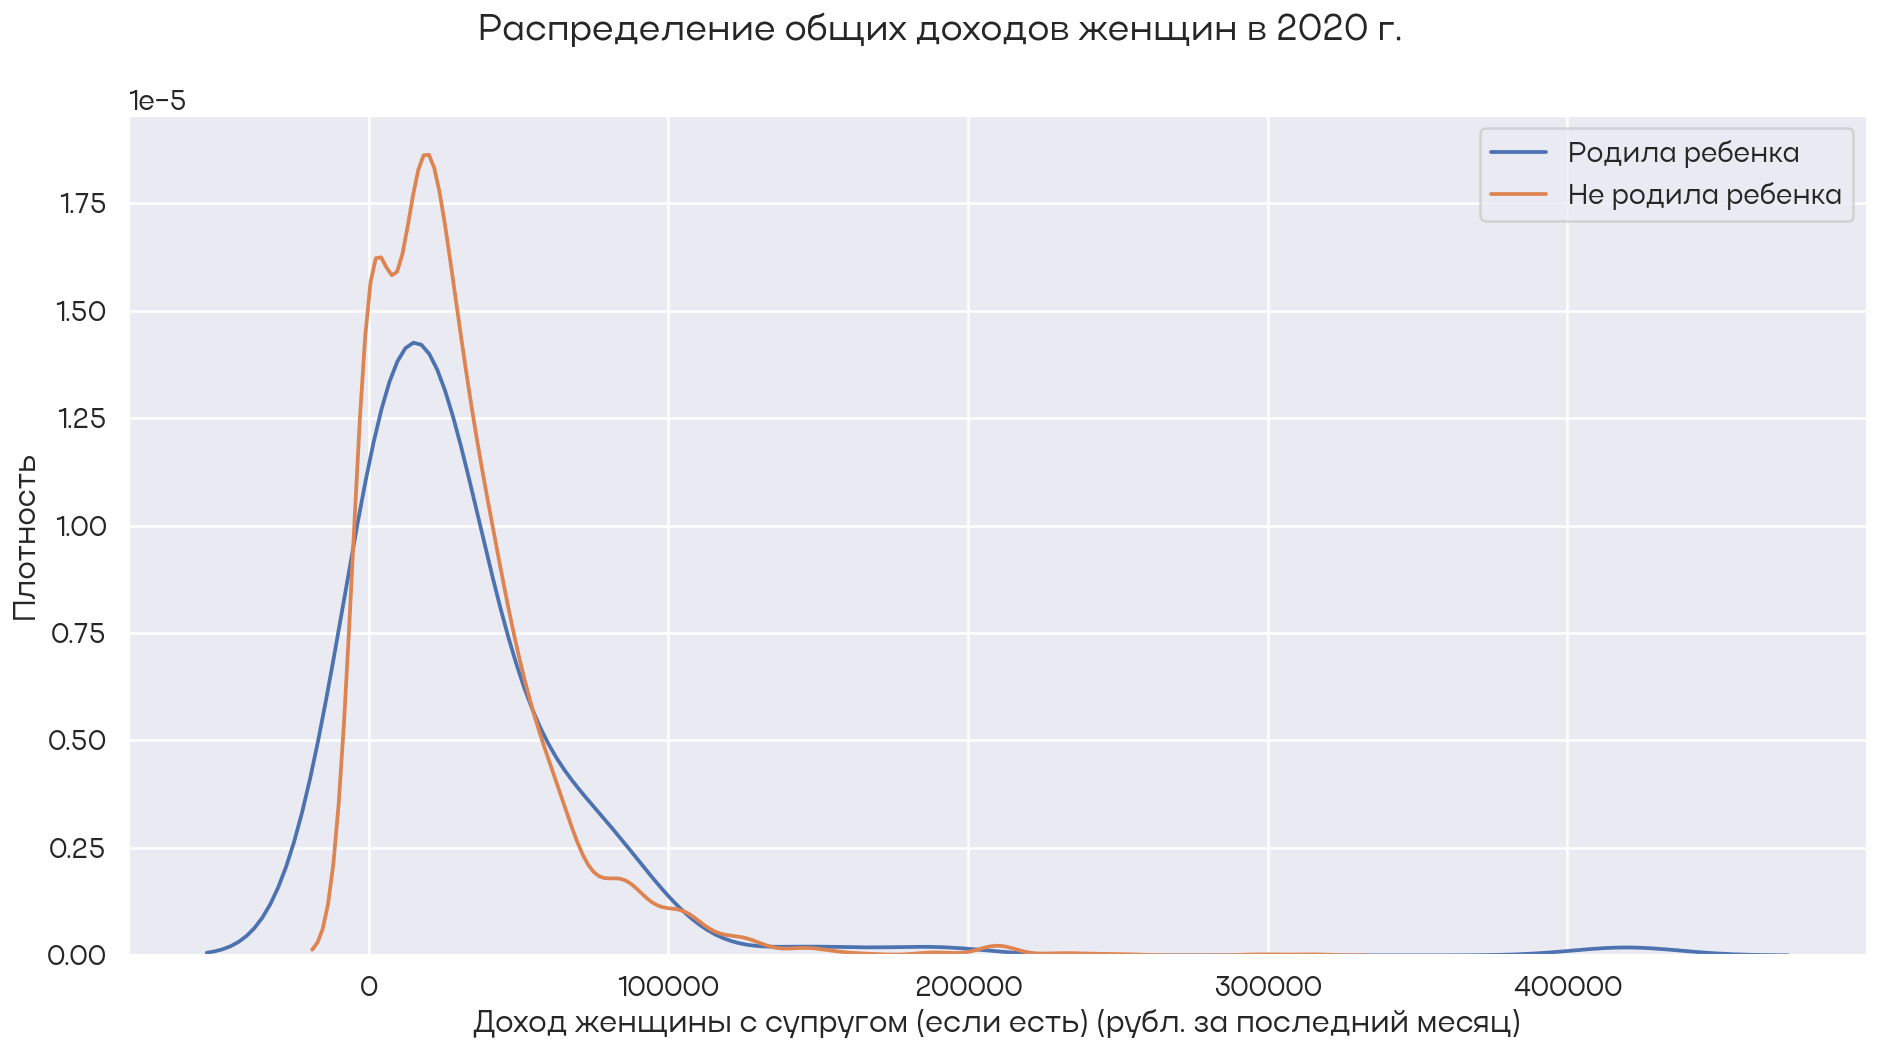

In [23]:
full_wage = fw[fw.id_w == 2020].full_wage
fig, ax = plt.subplots()
fig.suptitle("Распределение общих доходов женщин в 2020 г.")
sns.kdeplot(x=math.e ** full_wage[fw.poyavlenie_child == 1], ax=ax, palette=PALETTE)
sns.kdeplot(x=math.e ** full_wage[fw.poyavlenie_child == 0], ax=ax, palette=PALETTE)
ax.legend(["Родила ребенка", "Не родила ребенка"])
ax.set_xlabel("Доход женщины с супругом (если есть) (рубл. за последний месяц)")
ax.set_ylabel("Плотность")
fig.savefig("women_wage_distribution.svg")
# fmt: off
fig;

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/2103438337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/2103438337.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(
/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_69653/2103438337.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Не родила', 'Родила'])


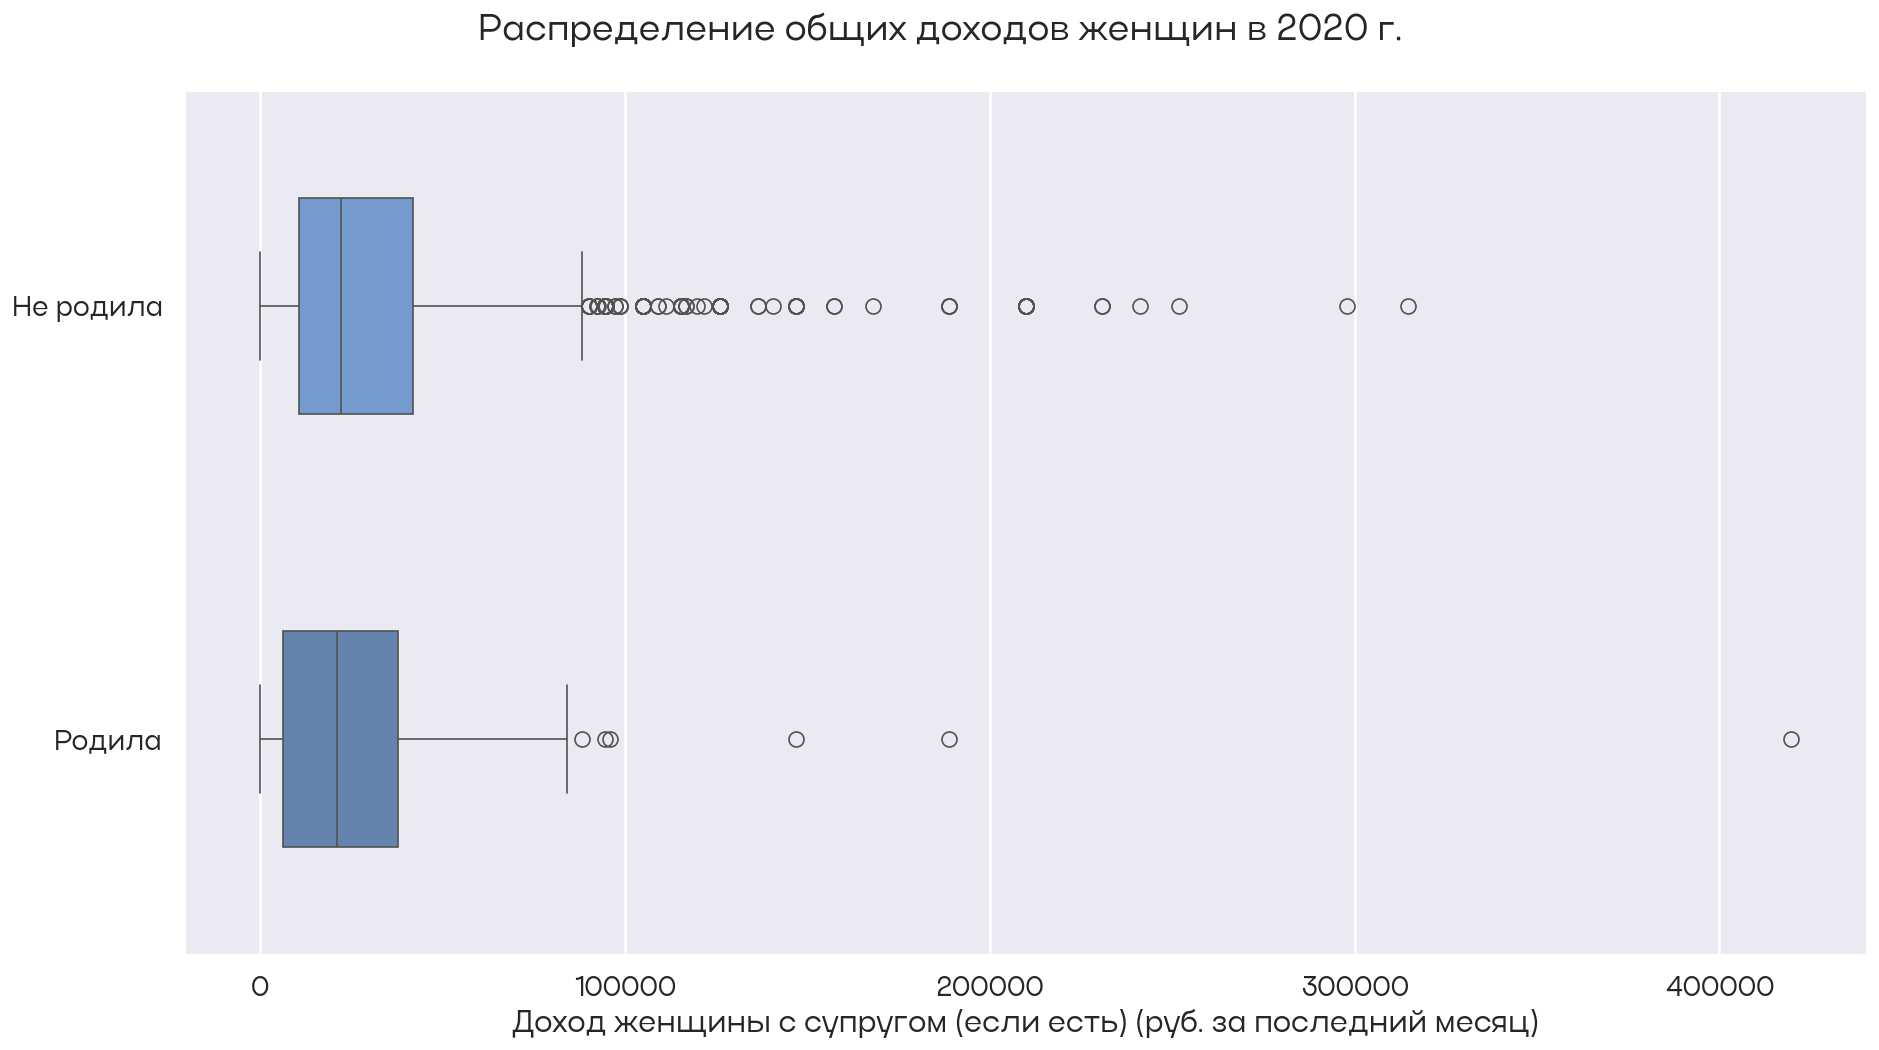

In [26]:
full_wage = fw[fw.id_w == 2020].full_wage
fig, ax = plt.subplots()
# fig.set_figwidth(8)
# fig.set_figheight(13)
fw["full_wage_linear"] = math.e**full_wage
fig.suptitle("Распределение общих доходов женщин в 2020 г.")
sns.boxplot(
    data=fw,
    x='full_wage_linear',
    y="poyavlenie_child",
    width=0.5,
    ax=ax,
    palette=PALETTE,
    orient='h'
)
# sns.boxplot(y=math.e ** full_wage[fw.poyavlenie_child == 0],x='1', width=.5, ax=ax, palette=PALETTE)
ax.set_xlabel("Доход женщины с супругом (если есть) (руб. за последний месяц)")
ax.set_yticklabels(['Не родила', 'Родила'])
ax.set_ylabel('')
# ax.legend(["Родила ребенка", "Не родила ребенка"])
# ax.set_ylabel("Плотность")

fig.savefig("women_wage_distribution.svg")
# fmt: off
fig;

### Удовлетворенность женщин отношениями с мужем/партнером (m4)

In [25]:
ind.k66_r[ind.k66_r < 99999997.0].quantile(.998)

163019.19999999955